In [71]:
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib 

In [284]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


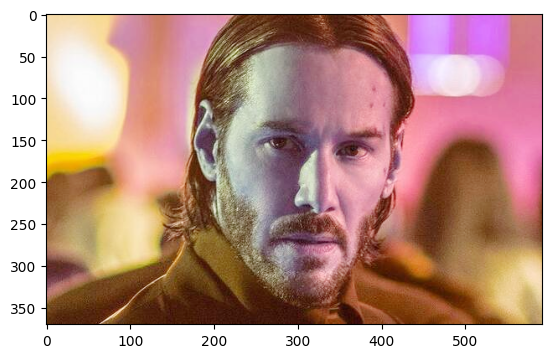

In [330]:
my_image_path = '/content/drive/MyDrive/AIFFEL/22.png' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

open cv : https://opencv-python.readthedocs.io/en/latest/doc/01.imageStart/imageStart.html

Q. cv2.imread('img.png', 0) 에서 0 은 무슨 의미일까요?

문서에 따르면 이미지 읽기의 flag는 다음 3가지가 있습니다. 순서대로 1, 0, -1의 값을 갖습니다.

cv2.IMREAD_COLOR : 이미지 파일을 Color로 읽어들입니다. 투명한 부분은 무시되며, Default값입니다.

cv2.IMREAD_GRAYSCALE : 이미지를 Grayscale로 읽어 들입니다. 실제 이미지 처리시 중간단계로 많이 사용합니다.

cv2.IMREAD_UNCHANGED : 이미지파일을 alpha channel까지 포함하여 읽어 들입니다.

cv2.imread('img.png', 0)이라고 호출했다면 이미지를 Grayscale로 읽어 들이겠다는 뜻입니다. 실제로 이미지 읽기 flag를 바꿔가면서 이미지가 어떻게 출력되는지 확인해 보세요.

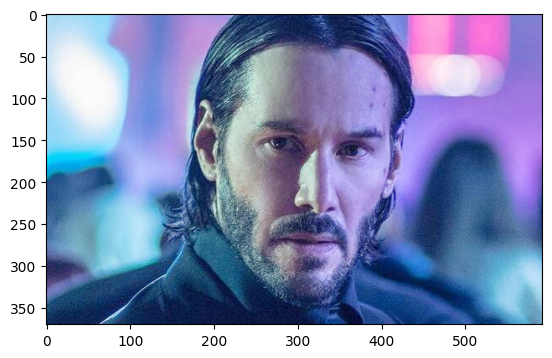

In [331]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [332]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

image Pyramid : https://opencv-python.readthedocs.io/en/latest/doc/14.imagePyramid/imagePyramid.html

rectangles[[(216, 93) (439, 316)]]


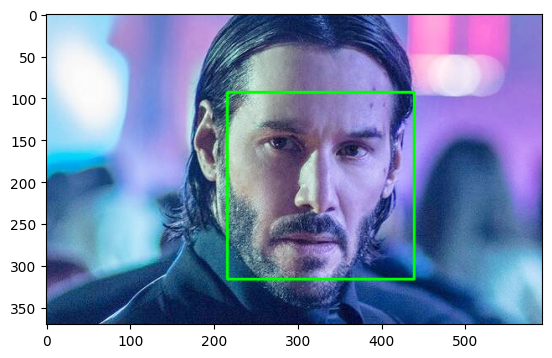

In [333]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

Object keypoint estimation 알고리즘

Face landmark와 같이 객체 내부의 점을 찾는 기술을 object keypoint estimation이라고 합니다. keypoint를 찾는 알고리즘은 크게 2가지로 나누어 집니다.

- top-down : bounding box를 찾고 box 내부의 keypoint를 예측

- bottom-up : 이미지 전체의 keypoint를 먼저 찾고 point 관계를 이용해 군집화 해서 box 생성

Up date dlib and download pre-trained weight

In [7]:
!pip install --upgrade dlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import dlib
print(dlib.__version__)

19.24.1


In [9]:
!pip install gdown
import gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import bz2

In [35]:
def unzip_bz2_file(zipped_file_name):
    zipfile = bz2.BZ2File(zipped_file_name)
    data = zipfile.read()
    newfilepath = output[:-4] #discard .bz2 extension
    open(newfilepath, 'wb').write(data)


if os.path.isfile('shape_predictor_68_face_landmarks.dat') != True:
    print("shape_predictor_5_face_landmarks.dat is going to be downloaded")

    url = "http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2"
    output = url.split("/")[-1]
    gdown.download(url, output, quiet=False)

    unzip_bz2_file(output)

if os.path.isfile('dlib_face_recognition_resnet_model_v1.dat') != True:
    print("dlib_face_recognition_resnet_model_v1.dat is going to be downloaded")  

    url = "http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2"
    output = url.split("/")[-1]
    gdown.download(url, output, quiet=False)

    unzip_bz2_file(output)

shape_predictor_5_face_landmarks.dat is going to be downloaded


Downloading...
From: http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
To: /content/shape_predictor_68_face_landmarks.dat.bz2
100%|██████████| 64.0M/64.0M [00:13<00:00, 4.61MB/s]


In [12]:
# import dlib

# detector = dlib.get_frontal_face_detector()
# sp = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
# facerec = dlib.face_recognition_model_v1("dlib_face_recognition_resnet_model_v1.dat")

In [61]:
model_path = '/content/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("🌫🛸")

🌫🛸


In [334]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


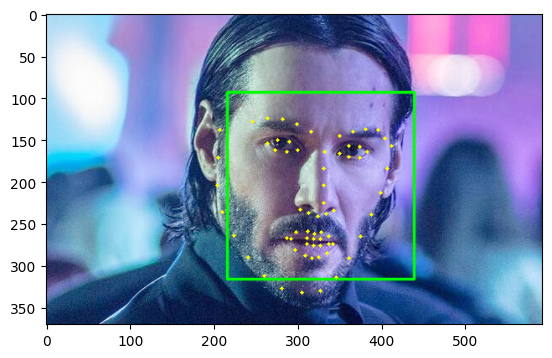

In [335]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력mlandmark

In [268]:
len(landmark)

68

In [336]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 6 location 에 맞는 index 
    x = landmark[33][0] # 이미지에서 6 location 의 x값
    y = landmark[33][1] + dlib_rect.height()//2 # 이미지에서 6 location 의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(324, 241)
(x,y) : (324,353)
(w,h) : (224,224)


(224, 224, 3)
(x,y) : (212,129)
(x,y) : (212,129)


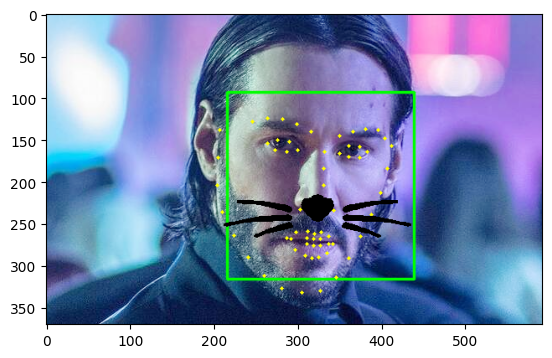

In [305]:
sticker_path = '/content/drive/MyDrive/AIFFEL/123.png' # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 437
# y는 이미지에서 코 부위의 y값 = 89
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
refined_x = x - w // 2 # 437 - (187//2) = 437-93 = 344
refined_y = y - h # 89-187 = -98
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.
# 왕관 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
# 예제에서는 (344,0) 부터 (344+187, 0+89) 범위의 이미지를 의미합니다.
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[0:0+89, 344:344+187]
# img_show[0:89, 344:531]
# 즉, x좌표는 344~531 / y좌표는 0~89가 됨
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# 왕관 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용합니다.
# 왕관 이미지에서 0이 나오는 부분은 흰색이라는 뜻, 즉 이미지가 없다는 소리임.
# 현재 왕관 이미지에서는 왕관과 받침대 밑의 ------ 부분이 됨
# 그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지입니다.
# 즉, 왕관 이미지에서 왕관 이미지가 없는 부분(왕관과 받침대 밑의 ------ 부분)은 원본 이미지에서 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고,
# 나머지 부분은 스티커로 채워주면 됨
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# 아래 코드에서는 img_sticker가 0일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(왕관 이미지)를 적용한다.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

# 왕관 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

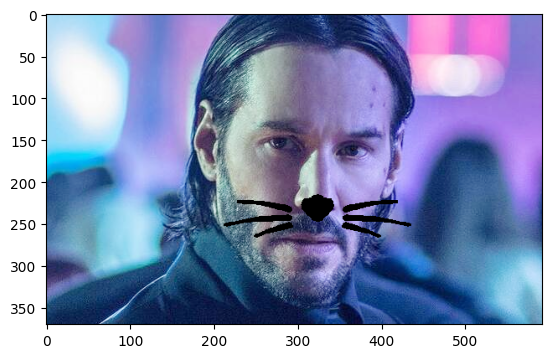

In [318]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

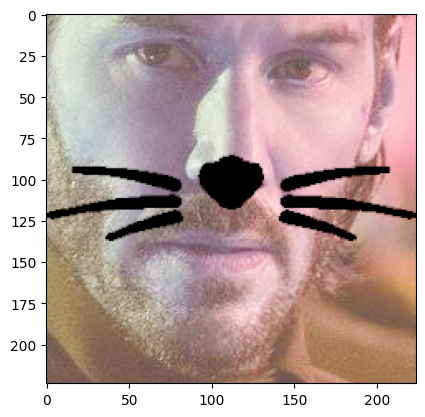

In [324]:
alpha = 0.7
plt.imshow(cv2.addWeighted(sticker_area, alpha,img_sticker,1-alpha, 0))

In [339]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

In [343]:
sticker_area = cv2.cvtColor(sticker_area, cv2.COLOR_BGR2RGB)

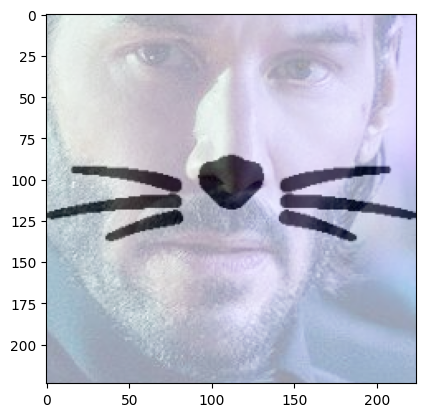

In [374]:
#Usung addWeighted
alpha = 0.4
img_add = cv2.addWeighted(sticker_area, alpha, img_sticker,1-alpha,0)
plt.imshow(cv2.addWeighted(sticker_area, alpha, img_sticker,1-alpha,0))

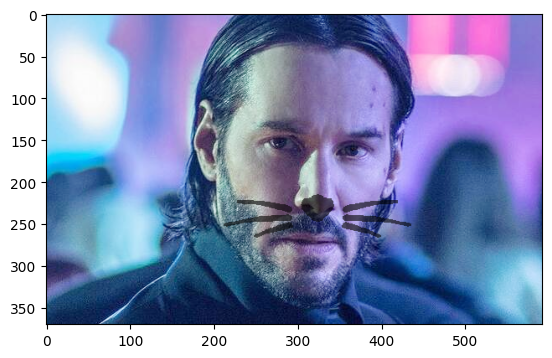

In [380]:
img_bgr = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker!=0,sticker_area,img_add).astype(np.uint8)
plt.imshow(img_bgr) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

## Step 5. 문제점 찾아보기

다음과 같은 문제점이 있을 수 있다.

- 얼굴이 카메라에 향하는 방향에 따라 스티커를 회전시켜야 한다. 얼굴의 특징점을 인식하고, 스티커를 해당 특징점에 맞게 회전 및 변형시켜야 한다.

------------------------------------------------------------

### Q)멀리서 촬영하면 왜 안될까요? 

A)멀리서 촬영할 경우 얼굴 영역이 작아지고, 얼굴 특징점을 정확하게 인식하기 어려워진다 따라서 멀리서 촬영할 때에도 얼굴을 정확히 인식하고 스티커를 적용하기 위해서는 얼굴 인식 모델의 정확도와 알고리즘의 성능이 좋아야 한다.

------------------------------------------------------------

### Q)옆으로 누워서 촬영하면 왜 안될까요? 

A)얼굴이 측면으로 비스듬하게 누워있을 경우, 얼굴의 형상이 변형되고 특징점이 왜곡된다. 이런 경우에도 얼굴 인식 알고리즘을 통해 정확한 얼굴 특징점을 인식하고, 스티커를 적용하기 위한 알고리즘을 개선해야한다.

------------------------------------------------------------

### Q)실행 속도가 중요할까요? 

A)실행 속도는 사용자 경험에 직접적으로 영향을 준다. 실시간으로 스티커를 적용하기 위해서는 빠른 실행 속도가 당연히 필수. 따라서 최적화된 알고리즘과 하드웨어 가속 기술을 활용하여 실행 속도를 향상시킬 필요가 있다.

------------------------------------------------------------

### A)스티커앱을 만들 때 정확도가 얼마나 중요할까요?

사용자는 정확하게 얼굴을 인식하고 스티커를 적용하는 것을 기대하며, 부자연스러운 결과나 오류가 발생하지 않도록 쾌적한 사용을 원하기 때문에.

------------------------------------------------------------

### A)다음과 같은 문제점들을 개선하기위한 방법으로는 무엇이 있을까?

얼굴 각도에 따라 스티커 변형: 얼굴 각도에 따라 스티커를 적절하게 회전시키는 것은 가능합니다. 이를 위해 얼굴 인식 알고리즘을 사용하여 얼굴의 각도를 추정하고, 회전 및 변형 파라미터를 계산하여 스티커를 적용할 수 있습니다. 또는 딥러닝을 사용하여 각도에 따른 스티커 변형을 학습할 수도 있습니다.

멀리서 촬영 시 얼굴 인식 문제: 멀리서 촬영할 때 얼굴 영역이 작아지고 인식이 어려워지는 문제를 해결하기 위해 얼굴 인식 알고리즘의 성능을 개선해야 합니다. 데이터 확장 기법을 사용하여 멀리서 촬영한 데이터를 추가로 학습시키거나, 멀리서 촬영 시 얼굴 특징을 추정하기 위한 추가적인 알고리즘을 적용할 수 있습니다.

옆으로 누워 촬영 시 문제: 옆으로 누워 촬영할 때 얼굴 형상이 변형되고 특징점이 왜곡되는 문제를 해결하기 위해 옆으로 누워 있는 얼굴도 정확히 인식할 수 있는 얼굴 인식 알고리즘의 개발이 필요합니다. 추가적인 특징점이나 형상 정보를 활용하여 옆으로 누워 있는 얼굴을 식별하고, 스티커를 적용할 수 있도록 알고리즘을 개선해야 합니다.

실행 속도 개선: 실행 속도를 개선하기 위해서는 알고리즘의 최적화와 하드웨어 가속 기술을 활용할 수 있습니다. 예를 들어, 얼굴 인식 알고리즘의 병렬화를 통해 다중 코어 또는 GPU를 활용하여 병렬 처리를 진행하거나, 모델 경량화 기법을 사용하여 실행 속도를 향상시킬 수 있습니다.


------------------------------------------------------------

### A)딥러닝을 사용하여 각도에 따른 스티커 변형을 학습할 수도 있다고 했는데 그런 딥러닝 모델이 무엇이 있을까??

- Facial Landmark Detection Models: 얼굴 특징점을 정확하게 인식하기 위한 모델로, 얼굴의 각도에 따른 특징점의 변화를 파악하는 데에 활용될 수 있다. 대표적인 모델로는 Dlib, MTCNN, FaceNet 등이 있습니다.

- Generative Adversarial Networks (GANs): GAN은 생성 모델로, 실제와 비슷한 가짜 이미지를 생성할 수 있는 능력을 갖추고 있습니다. 각도에 따른 얼굴 이미지를 변형하는 스티커를 생성하는 데에 활용될 수 있습니다. 예를 들어, Pix2Pix, CycleGAN 등의 GAN 모델을 사용할 수 있습니다.

- 3D Morphable Models (3DMM): 3DMM은 3D 모델 기반의 얼굴 형상 변화를 모델링하는 기법으로, 각도에 따른 얼굴 형상의 변화를 예측하는 데에 활용될 수 있습니다. 예를 들어, FLAME (Face Learning Aligned Model for Expression) 등의 3DMM 모델을 사용할 수 있습니다.